# Modelos de Regresion

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [3]:
desc = fetch_california_housing()
X,Y = fetch_california_housing(return_X_y = True)
#desc['DESCR']
data = pd.DataFrame(X, columns =desc['feature_names'] )
data[desc['target_names'][0]] = Y 

In [4]:
### Expliquemos el valor de la casa en funcion del ingreso del propietario

In [5]:
plt.figure('Ingresos VS Valor casa')
plt.scatter(data.MedInc, data.MedHouseVal)

<IPython.core.display.Javascript object>

In [6]:
### Matriz de Correlaciones
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [7]:
### Correlacion con la variable objetivo 
data.corr()['MedHouseVal']

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

## Kernel Regressor

In [8]:
# Genera datos de ejemplo
np.random.seed(0)
X = np.sort(5 * np.random.rand(4000))[:, np.newaxis]  # Asegúrate de que X tenga la forma (n_samples, 1)
y = np.sin(X).ravel() + np.random.normal(size = 4000, scale = 0.1)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Crea el regresor KNN
k = 100  # Número de vecinos a considerar
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Entrena el modelo
knn_regressor.fit(X_train, y_train)

# Predice para nuevos puntos
X_new = np.linspace(0, 5, 1000)[:, np.newaxis]  # Asegúrate de que X_new tenga la forma (n_samples, 1)
y_pred = knn_regressor.predict(X_new)

In [10]:
# Grafica los resultados
plt.figure('Ejemplo Knn Regressor')
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_new, y_pred, color='navy', label='prediction')
plt.legend()
plt.title('K-Nearest Neighbors Regressor')
plt.show()

<IPython.core.display.Javascript object>

### Ejemplo con datos de valor de la casa

In [11]:
K = 100
knn = KNeighborsRegressor(n_neighbors=K)
knn.fit(data.MedInc.values.reshape(len(data),1), data.MedHouseVal)

KNeighborsRegressor(n_neighbors=100)

In [12]:
# Predice para nuevos puntos
X_new = np.linspace(data.MedInc.min(), data.MedInc.max(), 100)[:, np.newaxis]
y_pred = knn.predict(X_new)

# Grafica los resultados
plt.figure('Knn Regressor')
plt.scatter(data.MedInc, data.MedHouseVal, color='darkorange', label='data')
plt.plot(X_new, y_pred, color='navy', label='prediction')
plt.legend()
plt.title('K-Nearest Neighbors Regressor')
plt.show()

<IPython.core.display.Javascript object>

### Regresion Lineal Simple

In [13]:
### Modelo de regresion lineal simple
X = pd.DataFrame({'intercept': np.ones(len(data)),
                  'MedInc': data.MedInc.values})
                                       
model = sm.OLS(data.MedHouseVal,X)
results = model.fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:52:07   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4509      0.013     34.082      0.000       0.425       0.477
MedInc         0.4179      0.003    136.223      0.000       0.412       0.424
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Predice para nuevos puntos
X_new = np.linspace(data.MedInc.min(), data.MedInc.max(), 100)[:, np.newaxis]

X_pred = sm.add_constant(X_new)
y_pred = results.predict(X_pred)

# Grafica los resultados
plt.figure('Simple Linear Regression')
plt.scatter(data.MedInc, data.MedHouseVal, color='darkorange', label='data')
plt.plot(X_new, y_pred, color='navy', label='prediction')
plt.legend()
plt.title('Linear regression')
plt.show()

<IPython.core.display.Javascript object>

## Modelando comportamientos no lineales

In [16]:
np.random.seed(0)

N = 1000
X = np.random.normal(loc = 0, scale = 1, size = N)
Y = 20 - 2*X - 6*X**2 + np.random.normal(scale = 2,size = N)

<IPython.core.display.Javascript object>


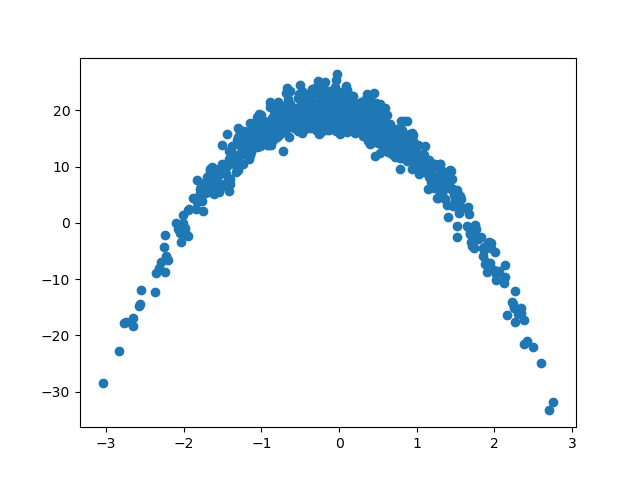

In [17]:
plt.figure('Scatter X vs Y - No Lineal')
plt.scatter(X,Y)

In [21]:
### Modelo de regresion lineal simple
#X = pd.DataFrame({'intercept': np.ones(N),
#                  'MedInc': X})

X = pd.DataFrame({'intercept': np.ones(N),
                  'MedInc': X,
                  'MedInc2': X**2,})
                                       
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

ValueError: Data must be 1-dimensional

<IPython.core.display.Javascript object>


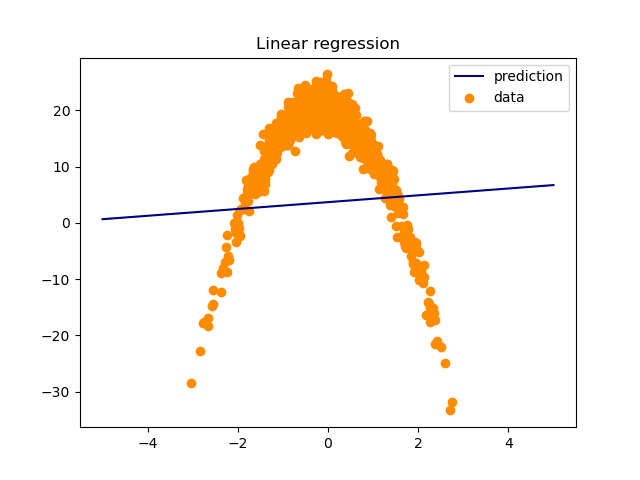

In [22]:
# Grafica los resultados
plt.figure('Simple Linear Regression - Non Linear vs linear')
plt.scatter(X.MedInc, Y, color='darkorange', label='data')
plt.plot(X_new.MedInc, y_pred, color='navy', label='prediction')
plt.legend()
plt.title('Linear regression')
plt.show()

<IPython.core.display.Javascript object>


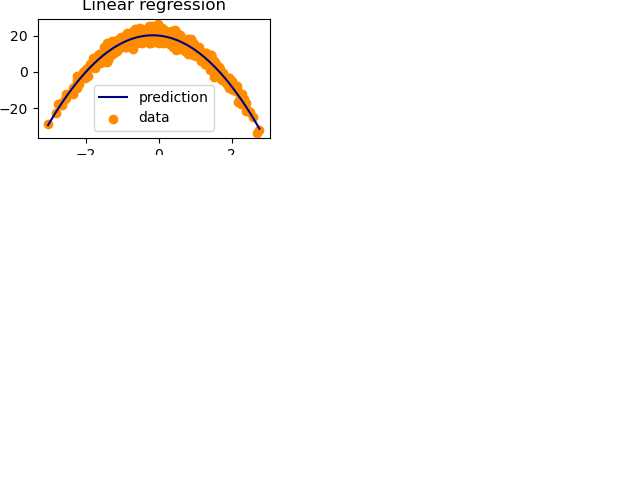

In [23]:
# Predice para nuevos puntos
X_new = pd.DataFrame()
X_new['MedInc'] = np.linspace(X.MedInc.min(), X.MedInc.max(), 100)
X_new['MedInc2'] = X_new['MedInc']**2

X_pred = sm.add_constant(X_new)
y_pred = results.predict(X_pred)

# Grafica los resultados
plt.figure('Simple Linear Regression - Non Linear')
plt.scatter(X.MedInc, Y, color='darkorange', label='data')
plt.plot(X_new.MedInc, y_pred, color='navy', label='prediction')
plt.legend()
plt.title('Linear regression')
plt.show()

### Modelo de Regresion Multiple

In [24]:
X = data.drop(columns = ['Latitude','Longitude','MedHouseVal'])
X = sm.add_constant(X)

Y = data['MedHouseVal']

In [25]:
model2 = sm.OLS(Y,X)
results2 = model2.fit()

In [26]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4032.
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:52:40   Log-Likelihood:                -24235.
No. Observations:               20640   AIC:                         4.848e+04
Df Residuals:                   20633   BIC:                         4.854e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4391      0.028    -15.918      0.000      -0.493      -0.385
MedInc         0.5369      0.004    130.183      0.000       0.529       0.545
HouseAge       0.0165      0.000     35.571      0.000       0.016       0.017
AveRooms      -0.2117      0.006    -35.237      0.000      -0.224      -0.200
AveBedrms      0.9937      0.030     33.669      0.000       0.936       1.052
Population  2.211e-05    5.1e-06      4.337      0.000    1.21e-05    3.21e-05
AveOccup      -0.0049      0.001     -9.262      0.000      -0.006      -0.004
==============================================================================
Omnibus:                     4480.630   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16778.766
Skew:                           1.053   Prob(JB):                         0.00
Kurtosis:                       6.883   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretacion de los coeficientes

In [27]:
### Ejemplo modelo econometrico

# Generar datos simulados para diferentes índices económicos
np.random.seed(0)
num_months = 100
fecha = pd.date_range('2020-01-01', periods=num_months, freq='M')

pib = np.cumsum(np.random.normal(100, 10, num_months))
tasa_desempleo = np.abs(np.random.normal(8, 1, num_months))
ipc = np.cumsum(np.random.normal(2, 0.5, num_months))
inversiones = np.cumsum(np.random.normal(80, 5, num_months))
produccion_industrial = np.cumsum(np.random.normal(120, 8, num_months))

# Crear un DataFrame con los datos generados
data = pd.DataFrame({
    'Fecha': fecha,
    'PIB': pib,
    'Tasa_Desempleo': tasa_desempleo,
    'IPC': ipc,
    'Inversiones': inversiones,
    'Produccion_Industrial': produccion_industrial
})

# Mostrar las primeras filas del DataFrame
print(data.head())

       Fecha         PIB  Tasa_Desempleo        IPC  Inversiones  \
0 2020-01-31  117.640523        9.883151   1.815409    73.467366   
1 2020-02-29  221.642096        6.652241   3.695719   161.758019   
2 2020-03-31  331.429475        6.729515   6.245549   241.167199   
3 2020-04-30  453.838407        8.969397   8.573181   317.766308   
4 2020-05-31  572.513987        6.826877  10.893247   401.098223   

   Produccion_Industrial  
0             115.210769  
1             226.283593  
2             352.416898  
3             475.267241  
4             581.118933  


In [28]:
# Ajustar un modelo de regresión lineal entre dos de los índices
X = data[['PIB','Tasa_Desempleo','IPC','Inversiones']]
X = sm.add_constant(X)
y = data['Produccion_Industrial']
model = sm.OLS(y, X)
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Produccion_Industrial   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 1.156e+06
Date:                   Sat, 28 Oct 2023   Prob (F-statistic):          1.07e-221
Time:                           11:53:22   Log-Likelihood:                -417.02
No. Observations:                    100   AIC:                             844.0
Df Residuals:                         95   BIC:                             857.1
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

In [29]:
# Ajustar un modelo de regresión lineal entre dos de los índices
X = data[['PIB','Tasa_Desempleo','IPC','Inversiones']]
X = sm.add_constant(X)
y = data['Produccion_Industrial']
X['Tasa_Desempleo'] = np.log(X['Tasa_Desempleo'])

model = sm.OLS(y, X)
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Produccion_Industrial   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 1.156e+06
Date:                   Sat, 28 Oct 2023   Prob (F-statistic):          1.10e-221
Time:                           11:53:50   Log-Likelihood:                -417.04
No. Observations:                    100   AIC:                             844.1
Df Residuals:                         95   BIC:                             857.1
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

# Seleccion de Variables

In [30]:
datos = pd.read_csv('SeleccionVariables.csv')

In [31]:
Y = datos['Peso']
X = datos.drop(columns = ['Peso'])
X = sm.add_constant(X)

modelo1 = sm.OLS(Y, X)
resultado1 = modelo1.fit()
resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Peso   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     12.34
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           6.97e-06
Time:                        11:54:31   Log-Likelihood:                -83.513
No. Observations:                  27   AIC:                             183.0
Df Residuals:                      19   BIC:                             193.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -135.1523     48.233     -2.802      0.011    -236.105     -34.199
sexo                    -0.6418      5.148     -0.125      0.902     -11.417      10.133
Estatura                -0.3970      0.465     -0.854      0.404      -1.371       0.577
Long_pie                 2.3121      1.463      1.580      0.131      -0.750       5.374
Long_brazo               0.8651      0.646      1.340      0.196      -0.486       2.216
Anchura_espalda          1.0842      0.687      1.578      0.131      -0.354       2.522
Diam_craneo              1.0810      0.971      1.113      0.279      -0.951       3.113
Long_rodilla_tobillo     0.0246      0.869      0.028      0.978      -1.794       1.843
==============================================================================
Omnibus:                        1.349   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                1.256
Skew:                           0.419   Prob(JB):                        0.534
Kurtosis:                       2.358   Cond. No.                     8.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
Y = datos['Peso']
X = X.drop(columns = ['Long_rodilla_tobillo'])

modelo2 = sm.OLS(Y, X)
resultado2 = modelo2.fit()
resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Peso   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     15.15
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.68e-06
Time:                        11:55:01   Log-Likelihood:                -83.513
No. Observations:                  27   AIC:                             181.0
Df Residuals:                      20   BIC:                             190.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -135.4071     46.188     -2.932      0.008    -231.754     -39.060
sexo               -0.6229      4.975     -0.125      0.902     -11.001       9.756
Estatura           -0.3931      0.433     -0.908      0.375      -1.297       0.510
Long_pie            2.3237      1.369      1.697      0.105      -0.532       5.180
Long_brazo          0.8663      0.628      1.380      0.183      -0.443       2.176
Anchura_espalda     1.0762      0.611      1.762      0.093      -0.198       2.351
Diam_craneo         1.0892      0.902      1.207      0.241      -0.793       2.972
==============================================================================
Omnibus:                        1.335   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                1.244
Skew:                           0.416   Prob(JB):                        0.537
Kurtosis:                       2.357   Cond. No.                     7.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
Y = datos['Peso']
X = X.drop(columns = ['sexo'])

modelo3 = sm.OLS(Y, X)
resultado3 = modelo3.fit()
resultado3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Peso   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     19.07
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.60e-07
Time:                        11:55:01   Log-Likelihood:                -83.524
No. Observations:                  27   AIC:                             179.0
Df Residuals:                      21   BIC:                             186.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -133.1250     41.433     -3.213      0.004    -219.289     -46.961
Estatura           -0.3835      0.416     -0.921      0.367      -1.249       0.482
Long_pie            2.2296      1.117      1.995      0.059      -0.094       4.553
Long_brazo          0.8479      0.596      1.423      0.169      -0.391       2.087
Anchura_espalda     1.0646      0.590      1.806      0.085      -0.161       2.291
Diam_craneo         1.1133      0.861      1.293      0.210      -0.677       2.903
==============================================================================
Omnibus:                        1.431   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                1.325
Skew:                           0.446   Prob(JB):                        0.516
Kurtosis:                       2.381   Cond. No.                     7.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
Y = datos['Peso']
X = X.drop(columns = ['Estatura'])

modelo4 = sm.OLS(Y, X)
resultado4 = modelo4.fit()
resultado4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Peso   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     23.79
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.02e-07
Time:                        11:55:02   Log-Likelihood:                -84.059
No. Observations:                  27   AIC:                             178.1
Df Residuals:                      22   BIC:                             184.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -136.0547     41.168     -3.305      0.003    -221.433     -50.677
Long_pie            1.5762      0.860      1.832      0.081      -0.208       3.361
Long_brazo          0.5506      0.499      1.103      0.282      -0.485       1.586
Anchura_espalda     0.9622      0.577      1.668      0.110      -0.234       2.159
Diam_craneo         0.9422      0.838      1.125      0.273      -0.795       2.679
==============================================================================
Omnibus:                        1.574   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.295
Skew:                           0.358   Prob(JB):                        0.523
Kurtosis:                       2.202   Cond. No.                     3.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
Y = datos['Peso']
X = X.drop(columns = ['Long_brazo'])

modelo5 = sm.OLS(Y, X)
resultado5 = modelo5.fit()
resultado5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Peso   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     31.03
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           2.94e-08
Time:                        11:55:04   Log-Likelihood:                -84.786
No. Observations:                  27   AIC:                             177.6
Df Residuals:                      23   BIC:                             182.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -121.8918     39.299     -3.102      0.005    -203.188     -40.596
Long_pie            2.1452      0.692      3.100      0.005       0.714       3.577
Anchura_espalda     1.2220      0.529      2.309      0.030       0.127       2.317
Diam_craneo         0.8058      0.832      0.968      0.343      -0.916       2.528
==============================================================================
Omnibus:                        1.069   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.947
Skew:                           0.420   Prob(JB):                        0.623
Kurtosis:                       2.630   Cond. No.                     2.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
Y = datos['Peso']
X = X.drop(columns = ['Diam_craneo'])

modelo6 = sm.OLS(Y, X)
resultado6 = modelo6.fit()
resultado6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Peso   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     46.19
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           5.91e-09
Time:                        11:55:04   Log-Likelihood:                -85.325
No. Observations:                  27   AIC:                             176.7
Df Residuals:                      24   BIC:                             180.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -87.2503     16.228     -5.376      0.000    -120.744     -53.756
Long_pie            2.2130      0.687      3.219      0.004       0.794       3.632
Anchura_espalda     1.4149      0.490      2.890      0.008       0.404       2.425
==============================================================================
Omnibus:                        0.966   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.951
Skew:                           0.384   Prob(JB):                        0.621
Kurtosis:                       2.493   Cond. No.                         842.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Estandarizacion

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
desc = fetch_california_housing()
X,Y = fetch_california_housing(return_X_y = True)
#desc['DESCR']
data = pd.DataFrame(X, columns =desc['feature_names'] )
data[desc['target_names'][0]] = Y 

data = data.drop(columns = ['Latitude','Longitude'])

In [40]:
scaler = StandardScaler()
data_z = scaler.fit_transform(data)
data_z = pd.DataFrame(data_z, columns = data.columns)

In [41]:
X_z = data_z.drop(columns = ['MedHouseVal'])
Y_z = data.MedHouseVal

In [43]:
data_z.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,3.734255e-16,8.557001e-16,2.704111e-16,-1.531384e-16,-6.465442e-17,6.064808e-19,1.466140e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.662641e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.561633e-01
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-2.353337e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,5.014973e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.540411e+00


# Regresion Ridge

In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_z, 
                                                    Y_z, 
                                                    test_size=0.2, random_state=42)


# Definir valores de alpha usando linspace
alpha_linear = np.linspace(0.001, 100, num=100)  # Genera 100 valores linealmente espaciados entre 0.001 y 100
param_grid = {'alpha': alpha_linear}
#print("Valores de alpha usando linspace:", alpha_linear)

# Inicializar el modelo de regresión ridge
ridge = Ridge()

# Realizar la búsqueda de parámetros óptimos con validación cruzada
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprimir el mejor parámetro de penalización encontrado
print("Mejor parámetro de penalización:", grid_search.best_params_)

# Obtener el mejor modelo encontrado
best_ridge_model = grid_search.best_estimator_

Mejor parámetro de penalización: {'alpha': 42.42481818181818}


In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
y_pred = grid_search.predict(X_test)

mean_squared_error(y_test,y_pred)

0.6402024409731087

In [47]:
grid_search.best_estimator_.coef_

array([ 1.0245783 ,  0.211231  , -0.52729276,  0.50248516,  0.02637686,
       -0.0476317 ])

# Regresion Lasso

In [48]:
from sklearn.linear_model import LassoCV

# Inicializar el modelo de regresión Lasso con validación cruzada para la selección automática de alpha
lasso_cv = LassoCV(alphas=None, cv=5)

# Ajustar el modelo con los datos de entrenamiento
lasso_cv.fit(X_train, y_train)

# Obtener el mejor valor de alpha encontrado
best_alpha = lasso_cv.alpha_
print("Mejor valor de alpha:", best_alpha)

# Utilizar el mejor modelo para hacer predicciones en el conjunto de prueba
y_pred = lasso_cv.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Mejor valor de alpha: 0.0017243975516851087
Error cuadrático medio: 0.6399185157499838


In [49]:
lasso_cv.coef_

array([ 1.02410109,  0.20946136, -0.52450402,  0.49912787,  0.02408147,
       -0.04616263])

# Elastic Net

In [50]:
from sklearn.linear_model import ElasticNetCV

# Inicializar el modelo Elastic Net con validación cruzada para la selección automática de alpha y l1_ratio
elastic_net_cv = ElasticNetCV(cv=5)

# Ajustar el modelo con los datos de entrenamiento
elastic_net_cv.fit(X_train, y_train)

# Obtener los mejores valores de alpha y l1_ratio encontrados
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_
print("Mejor valor de alpha:", best_alpha)
print("Mejor valor de l1_ratio:", best_l1_ratio)

# Utilizar el mejor modelo para hacer predicciones en el conjunto de prueba
y_pred = elastic_net_cv.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Mejor valor de alpha: 0.002269076883543597
Mejor valor de l1_ratio: 0.5
Error cuadrático medio: 0.6398390901750869


In [51]:
elastic_net_cv.coef_

array([ 1.02299159,  0.21006286, -0.5228536 ,  0.49773021,  0.02488256,
       -0.0466335 ])